## Regression

In [58]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# request_name : (<coefficient>, <avg_rate>)

specs = {
"products/science.php" :       (1.0, 1.0),
"products/non-fiction.php" :   (2.0, 10.0),
"products/children.php" :      (3.0, 0.3),
"products/fiction.php" :       (4.0, 5.0),
"api/comment" :                (5.0, 30.0),
"api/product/get.php":         (6.0, 2.0),
"resources/css/*":             (7.0, 4.0),
"resources/js/*" :             (8.0, 0.7)
}

coefs = np.array([c for _, (_, c) in specs.iteritems()])

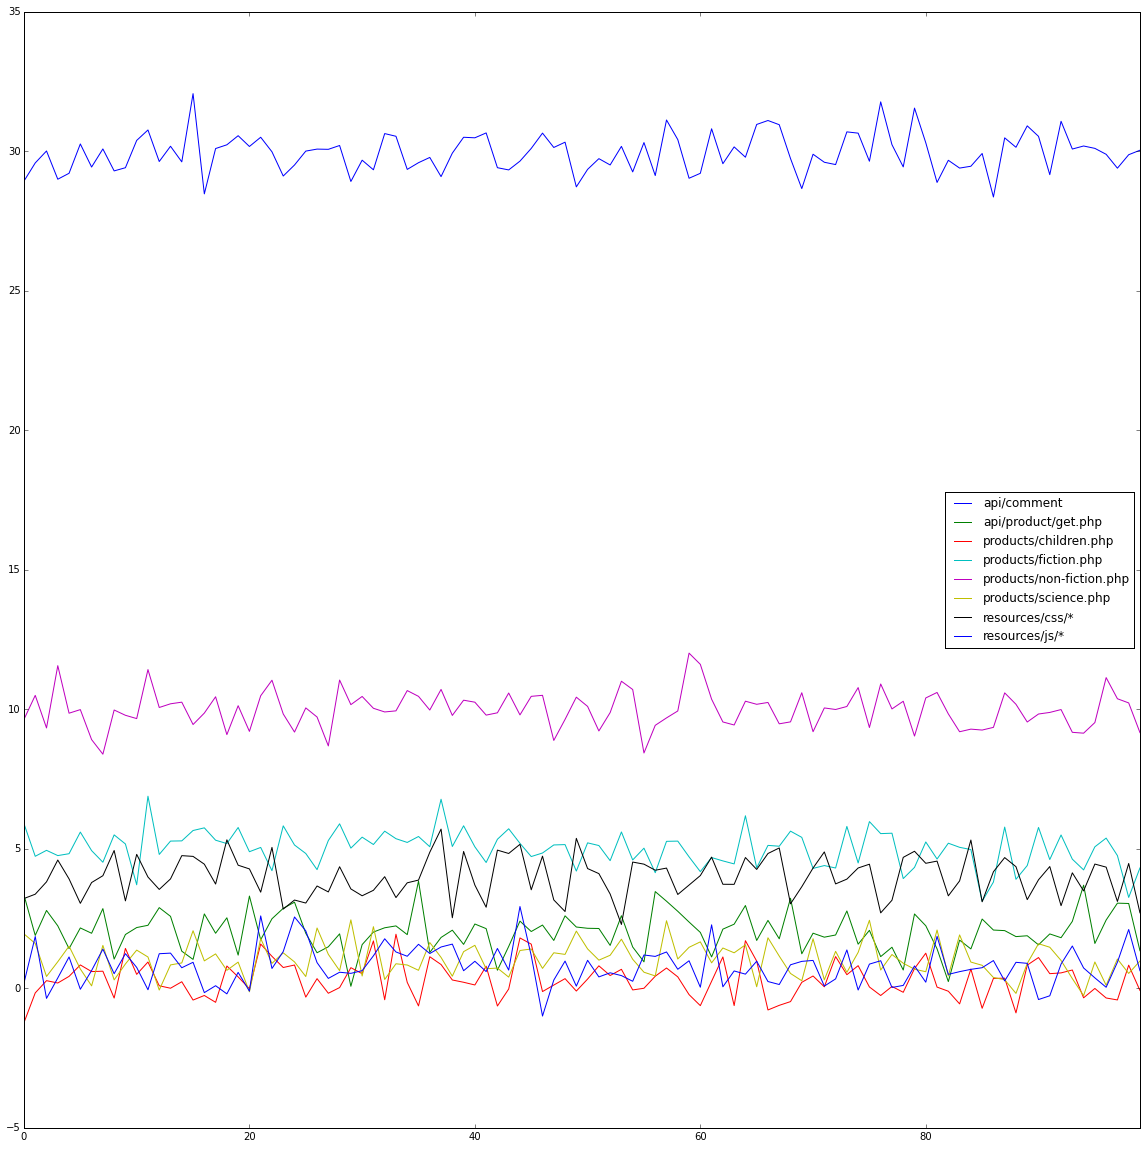

In [59]:
N = 100
rates = {name : 
    np.full(N, rate) + 0.7 * np.random.randn(N)
    for name, (coef, rate) in specs.iteritems()}
df = pd.DataFrame.from_dict(rates)
df.plot(figsize=(20, 20))

In [60]:
cpu = df.values.dot(coefs) + 10.0 * np.random.randn(N)

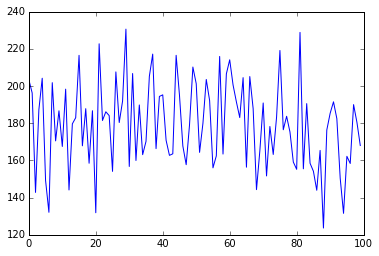

In [61]:
plt.plot(cpu)

In [62]:
df['CPU'] = pd.Series(cpu, index=df.index)

In [63]:
df.to_csv("data/request_rate_vs_CPU.csv")